# CASE STUDY-BANKING

CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Q=pd.read_excel('G:/AnalytixLab/Data Set.xlsx')
data=Q.copy()
data.head(3)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0


In [3]:
data.drop(['custid','birthmonth'],axis=1,inplace=True)
data.head(2)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,15,3,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,1,1,0,0,0


In [4]:
# Creating a new column for dependent variable, derrived from card-spending of both cards. 
data['total_spend']=data['cardspent']+data['card2spent'];
data['ln_total_spend']=np.log(data['cardspent']+data['card2spent']+1)
data.head(2)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend,ln_total_spend
0,1,2.0,1,20,2,15,3,1,1,0,...,0,1,1,0,0,0,1,0,149.46,5.013697
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,0,0,0,77.54,4.363608


In [5]:
print('Percentage of NULL-values in each columns:')
print(((data.isnull().sum()/5000)*100).sort_values(ascending=False).head(16))

Percentage of NULL-values in each columns:
lnwireten      73.12
lnwiremon      73.12
lnequipten     65.92
lnequipmon     65.92
lntollten      52.44
lntollmon      52.44
lncardten      28.44
lncardmon      28.38
longten         0.06
lnlongten       0.06
cardten         0.04
commutetime     0.04
townsize        0.04
lncreddebt      0.02
lnothdebt       0.02
carown          0.00
dtype: float64


These variables whose % of NULL values is more than 25% will be removed completely for our analysis. Normally we remove those variables where missing value percentage is around +50%, but since here variables such as "lncardten" whose % of missing value is just above 25% & is a derrived variables, we may remove it as it is well represented by its core-variable i.e. "cardten".

In [6]:
data.drop(['lnwireten','lnwiremon','lnequipten','lnequipmon','lntollten','lntollmon','lncardten','lncardmon'],
          axis=1,inplace=True)

In [7]:
data.shape

(5000, 122)

In [8]:
# List of categorical-variables(excluding some numerical variables which were in categorical variables list .viz "employ" etc.)

t=['region','townsize','agecat','edcat','jobcat','empcat','inccat','jobsat','spousedcat','hometype','addresscat','carown',
   'cartype','carcatvalue','carbought','commute','commutecat','reason','polview','card','cardtype','cardbenefit',
   'cardtenurecat','card2','card2type','card2benefit','card2tenurecat','bfast','internet','gender','union','retire','default',
   'marital','homeown','carbuy','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
   'commutebike','commutewalk','commutenonmotor','telecommute','polparty','polcontrib','vote','cardfee','card2fee','active',
   'churn','tollfree','equip','callcard','wireless','multline','voice','pager','callid','callwait','forward','confer','ebill',
   'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
   'response_03']

In [9]:
# segregating continous & categorical data.

categ_vars=pd.DataFrame();
for z in t:
    categ_vars[z]=data[z].astype('object')
    
cont_vars=data[data.columns.difference(t)] # dataframe of all continous variables
print(f'Continous Variables: {cont_vars.shape[1]}')
print(f'Categorical Variables: {categ_vars.shape[1]}')
categ_vars.dtypes.head(5)

Continous Variables: 44
Categorical Variables: 78


region      object
townsize    object
agecat      object
edcat       object
jobcat      object
dtype: object

In [10]:
def contimous_var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),
                      x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),
                      x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),
                      x.dropna().quantile(0.99),x.max()],index=['N','NMISS','SUM','MEAN','MEDIAN','St~DEV','VAR','MIN','P1',
                                                                'P5','P10','P25','P50','P75','P90','P95','P99','MAX'])
cont_vars.apply(lambda a:contimous_var_summary(a)).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,St~DEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
address,5000.0,0.0,82012.00,16.40,14.00,12.40,153.70,0.00,0.00,1.00,2.00,6.00,14.00,25.00,34.00,40.00,48.00,57.00
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
card2spent,5000.0,0.0,804380.55,160.88,125.34,146.29,21401.57,0.00,0.00,14.82,28.64,66.97,125.34,208.31,324.72,419.45,712.13,2069.25
card2tenure,5000.0,0.0,65422.00,13.08,12.00,9.12,83.16,0.00,0.00,1.00,2.00,5.00,12.00,21.00,27.00,29.00,30.00,30.00
cardmon,5000.0,0.0,77219.25,15.44,13.75,15.01,225.23,0.00,0.00,0.00,0.00,0.00,13.75,22.75,34.00,42.00,64.25,188.50
cardspent,5000.0,0.0,1686012.60,337.20,276.36,245.15,60096.10,0.00,40.82,91.30,122.53,183.38,276.36,418.54,610.06,782.32,1215.81,3926.41
cardten,4998.0,2.0,3600951.00,720.48,425.00,922.23,850499.92,0.00,0.00,0.00,0.00,0.00,425.00,1080.00,1871.50,2455.75,4011.20,13705.00
cardtenure,5000.0,0.0,83279.00,16.66,14.00,12.02,144.50,0.00,0.00,1.00,2.00,6.00,14.00,26.00,35.00,38.00,40.00,40.00
cars,5000.0,0.0,10653.00,2.13,2.00,1.31,1.71,0.00,0.00,0.00,1.00,1.00,2.00,3.00,4.00,4.00,6.00,8.00
carvalue,5000.0,0.0,116162.90,23.23,17.00,21.23,450.78,-1.00,-1.00,-1.00,2.49,9.20,17.00,31.10,52.91,72.00,92.00,99.60


In [11]:
def categorical_var_summary(x):
    Mode=x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([x.count(),x.isnull().sum(),Mode.iloc[0:0],Mode.iloc[0,1],round(Mode.iloc[0,1]*100/x.count(),2)],
                     index=['N','NMISS','MODE','FREQ','PERCENT'])
categ_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
region,5000,0,"Empty DataFrame Columns: [index, region] Index...",1027,20.54
townsize,4998,2,"Empty DataFrame Columns: [index, townsize] Ind...",1436,28.73
agecat,5000,0,"Empty DataFrame Columns: [index, agecat] Index...",1222,24.44
edcat,5000,0,"Empty DataFrame Columns: [index, edcat] Index: []",1567,31.34
jobcat,5000,0,"Empty DataFrame Columns: [index, jobcat] Index...",1640,32.8
...,...,...,...,...,...
ownfax,5000,0,"Empty DataFrame Columns: [index, ownfax] Index...",4106,82.12
news,5000,0,"Empty DataFrame Columns: [index, news] Index: []",2637,52.74
response_01,5000,0,"Empty DataFrame Columns: [index, response_01] ...",4582,91.64
response_02,5000,0,"Empty DataFrame Columns: [index, response_02] ...",4351,87.02


In [12]:
# Outliers-handling

cont_vars2=cont_vars.apply(lambda x: x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [13]:
cont_vars2.apply(lambda a:contimous_var_summary(a)).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,St~DEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
address,5000.0,0.0,81832.00,16.37,14.00,12.30,151.24,0.00,0.00,1.00,2.00,6.00,14.00,25.00,34.00,40.00,48.00,48.00
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
card2spent,5000.0,0.0,793007.58,158.60,125.34,133.23,17750.32,0.00,0.00,14.82,28.64,66.97,125.34,208.31,324.72,419.45,712.10,712.13
card2tenure,5000.0,0.0,65422.00,13.08,12.00,9.12,83.16,0.00,0.00,1.00,2.00,5.00,12.00,21.00,27.00,29.00,30.00,30.00
cardmon,5000.0,0.0,76334.75,15.27,13.75,14.16,200.40,0.00,0.00,0.00,0.00,0.00,13.75,22.75,34.00,42.00,64.25,64.25
cardspent,5000.0,0.0,1668122.38,333.62,276.36,221.38,49007.94,40.82,40.83,91.30,122.53,183.38,276.36,418.54,610.06,782.32,1215.80,1215.81
cardten,4998.0,2.0,3534781.00,707.24,425.00,848.34,719680.59,0.00,0.00,0.00,0.00,0.00,425.00,1080.00,1871.50,2455.75,4010.04,4011.20
cardtenure,5000.0,0.0,83279.00,16.66,14.00,12.02,144.50,0.00,0.00,1.00,2.00,6.00,14.00,26.00,35.00,38.00,40.00,40.00
cars,5000.0,0.0,10638.00,2.13,2.00,1.30,1.68,0.00,0.00,0.00,1.00,1.00,2.00,3.00,4.00,4.00,6.00,6.00
carvalue,5000.0,0.0,116011.15,23.20,17.00,21.13,446.47,-1.00,-1.00,-1.00,2.49,9.20,17.00,31.10,52.91,72.00,92.00,92.00


In [14]:
print(cont_vars2.isnull().sum().sort_values(ascending=False).head(16))
print('')
print(categ_vars.isnull().sum().sort_values(ascending=False).head(3))

lnlongten         3
longten           3
cardten           2
commutetime       2
lncreddebt        1
lnothdebt         1
debtinc           0
income            0
hourstv           0
equipten          0
equipmon          0
employ            0
ed                0
wireten           0
ln_total_spend    0
carvalue          0
dtype: int64

townsize       2
response_03    0
internet       0
dtype: int64


In [15]:
def data_amputation_cont_vars(x):
    x=x.fillna(x.mean())
    return x

def data_amputation_categ_vars(x):
    x=x.fillna(x.mode().values[0])
    return x

cont_vars2=cont_vars2.apply(lambda x: data_amputation_cont_vars(x));
categ_vars=categ_vars.apply(lambda x: data_amputation_categ_vars(x));

In [16]:
print(f'Number of NUll values in categorical variables-dataframe:{categ_vars.isnull().sum().sort_values(ascending=False).values.sum()}')
print(f'Number of NUll values in continous variables-dataframe:{cont_vars2.isnull().sum().sort_values(ascending=False).values.sum()}')

Number of NUll values in categorical variables-dataframe:0
Number of NUll values in continous variables-dataframe:0


In [17]:
# import pandas_profiling as PP
# PP.ProfileReport(data)

In [18]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

for c_features in ['region','townsize','agecat','edcat','jobcat','empcat','inccat','jobsat','spousedcat','hometype',
                   'addresscat','carown','cartype','carcatvalue','carbought','commute','commutecat','reason','polview','card',
                   'cardtype','cardbenefit','cardtenurecat','card2','card2type','card2benefit','card2tenurecat','bfast',
                   'internet']:
    categ_vars[c_features]=categ_vars[c_features].astype('category')
    categ_vars=create_dummies(categ_vars,c_features)
categ_vars.head(3)

,gender,union,retire,default,marital,homeown,carbuy,commutecar,commutemotorcycle,commutecarpool,...,card2tenurecat_4,card2tenurecat_5,bfast_1,bfast_2,bfast_3,internet_0,internet_1,internet_2,internet_3,internet_4
0,1,1,0,1,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,1,...,0,1,0,0,1,1,0,0,0,0


In [19]:
clean_data=pd.concat([cont_vars2,categ_vars],axis=1)
data2=clean_data.copy(); #dataframe to be used for further steps, so that my cleaned dataframe remains intact, just for backup.
pd.options.display.max_columns = None
data2.rename(columns=
             {'townsize_1.0':'townsize_1','townsize_2.0':'townsize_2','townsize_3.0':'townsize_3','townsize_4.0':'townsize_4',
              'townsize_5.0':'townsize_5','carown_-1':'carown_minus1','cartype_-1':'cartype_minus1',
              'carcatvalue_-1':'carcatvalue_minus1','carbought_-1':'carbought_minus1','spousedcat_-1':'spousedcat_minus1'},
             inplace=True)
print(data2.shape)
data2.head(3)

(5000, 233)


,address,age,card2spent,card2tenure,cardmon,cardspent,cardten,cardtenure,cars,carvalue,commutetime,creddebt,debtinc,ed,employ,equipmon,equipten,hourstv,income,ln_total_spend,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten,gender,union,retire,default,marital,homeown,carbuy,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,card2fee,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_1,region_2,region_3,region_4,region_5,townsize_1,townsize_2,townsize_3,townsize_4,townsize_5,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_1,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,empcat_1,empcat_2,empcat_3,empcat_4,empcat_5,inccat_1,inccat_2,inccat_3,inccat_4,inccat_5,jobsat_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,spousedcat_minus1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,hometype_1,hometype_2,hometype_3,hometype_4,addresscat_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carown_minus1,carown_0,carown_1,cartype_minus1,cartype_0,cartype_1,carcatvalue_minus1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_minus1,carbought_0,carbought_1,commute_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_1,commutecat_2,commutecat_3,commutecat_4,commutecat_5,reason_1,reason_2,reason_3,reason_4,reason_9,polview_1,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,card_1,card_2,card_3,card_4,card_5,cardtype_1,cardtype_2,cardtype_3,cardtype_4,cardbenefit_1,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardtenurecat_1,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_1,card2_2,card2_3,card2_4,card2_5,card2type_1,card2type_2,card2type_3,card2type_4,card2benefit_1,card2benefit_2,card2benefit_3,card2benefit_4,card2tenurecat_1,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,bfast_1,bfast_2,bfast_3,internet_0,internet_1,internet_2,internet_3,internet_4
0,0,20,67.80,3,14.25,81.66,60.0,2,2,14.3,22.0,1.200909,11.1,15,0,29.50,126.1,13,31.0,5.013697,0.183079,3.433987,1.871802,3.538057,0.806516,6.5,34.40,2.240091,0,0,0,0,0,0,0,0,3,-1,5,29.0,161.05,149.46,0.00,0.00,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,2,22,34.94,4,16.00,42.60,610.0,4,2,6.8,29.0,1.222020,18.6,17,0,54.85,1975.0,18,15.0,4.363608,0.200505,2.708050,2.186051,5.800909,0.449788,8.9,330.60,1.567980,6,0,0,0,6,0,0,0,2,-1,39,0.0,0.00,77.54,45.65,1683.55,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,30,67,175.75,25,23.00,184.22,1410.0,35,3,18.8,24.0,0.928620,9.9,14,16,0.00,0.0,21,35.0,5.888795,-0.074056,3.555348,3.346389,7.527444,0.930738,28.4,1858.35,2.536380,3,0,2,1,0,0,0,0,3,13,65,0.0,0.00,359.97,0.00,0.00,1,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,

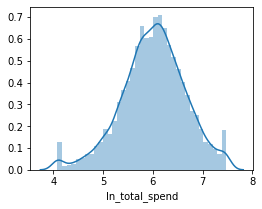

In [20]:
plt.figure(figsize=(4,3))
sns.distplot(data2.ln_total_spend)

In [21]:
# created just for testing, nowhere used

from sklearn.model_selection import train_test_split
feature_columns=data2.columns.difference(['ln_total_spend','total_spend','cardspent','card2spent'])
X_train,X_test,Y_train,Y_test=train_test_split(data2[feature_columns],data2['ln_total_spend'],test_size=0.2,random_state=123);

print (len(X_train))
print (len(X_test))
print (len(Y_train))
print (len(Y_test))

4000
1000
4000
1000


In [22]:
train,test=train_test_split(data2,test_size=0.3,random_state=321);

print (len(train))
print (len(test))

3500
1500


In [23]:
all_features='+'.join(list(feature_columns))
all_features

'active+address+addresscat_1+addresscat_2+addresscat_3+addresscat_4+addresscat_5+age+agecat_2+agecat_3+agecat_4+agecat_5+agecat_6+bfast_1+bfast_2+bfast_3+callcard+callid+callwait+carbought_0+carbought_1+carbought_minus1+carbuy+carcatvalue_1+carcatvalue_2+carcatvalue_3+carcatvalue_minus1+card2_1+card2_2+card2_3+card2_4+card2_5+card2benefit_1+card2benefit_2+card2benefit_3+card2benefit_4+card2fee+card2tenure+card2tenurecat_1+card2tenurecat_2+card2tenurecat_3+card2tenurecat_4+card2tenurecat_5+card2type_1+card2type_2+card2type_3+card2type_4+card_1+card_2+card_3+card_4+card_5+cardbenefit_1+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee+cardmon+cardten+cardtenure+cardtenurecat_1+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+cardtype_1+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+carown_minus1+cars+cartype_0+cartype_1+cartype_minus1+carvalue+churn+commute_1+commute_10+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commutebike+commuteb

In [24]:
# VIF values generation

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
all_features='+'.join(list(data2.columns))
model_param='''ln_total_spend~all_features'''
y,x=dmatrices('ln_total_spend~'+all_features,train,return_type='dataframe')
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
# pd.set_option('display.max_rows',None)
# vif.round(2).sort_values(by='VIF Factor')
vif.to_csv(r'C:\Users\Himanshu Shekhar Pal\Desktop\VIF.csv', index = False)

D:\Anaconda3.7_installed\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
D:\Anaconda3.7_installed\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [25]:
# F-Regression to generate F-values

from sklearn.feature_selection import f_regression
import itertools
feature=X_train;
target=Y_train;
F_values,p_values=f_regression(feature,target);
f_reg_results=[(i,v,z) for i,v,z in itertools.zip_longest(feature.columns,F_values,['%.3f'%p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results,columns=['Variables','F-value','p_value'])
# f_reg_results['p-value_numeric']=pd.to_numeric(f_reg_results.p_value)
pd.set_option('display.max_rows',None)
f=f_reg_results.loc[(f_reg_results.p_value==0.1)|(pd.to_numeric(f_reg_results.p_value)<0.1)].sort_values(by=['F-value'],
                                                                                                         ascending=False)
f.to_csv(r'C:\Users\Himanshu Shekhar Pal\Desktop\fvalue.csv', index = False)

In [26]:
import statsmodels.formula.api as smf
lm1=smf.ols('''ln_total_spend~address+addresscat_1+addresscat_2+addresscat_3+addresscat_4+age+agecat_3+agecat_4+agecat_5+
agecat_6+bfast_1+bfast_2+bfast_3+carbought_0+carbought_1+carbought_minus1+carbuy+carcatvalue_1+carcatvalue_2+carcatvalue_3+
carcatvalue_minus1+card2_1+card2_2+card2_3+card2_5+card2benefit_1+card2benefit_2+card2benefit_3+card2benefit_4+card2fee+
card2tenure+card2tenurecat_1+card2tenurecat_2+card2tenurecat_3+card2tenurecat_4+card2type_1+card2type_2+card2type_3+card2type_4+
card_1+card_2+card_4+card_5+cardbenefit_1+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee+cardmon+cardten+cardtenure+
cardtenurecat_1+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtype_1+cardtype_2+cardtype_3+cardtype_4+carown_0+carown_1+
carown_minus1+cartype_0+cartype_1+cartype_minus1+carvalue+churn+commute_10+commute_2+commute_3+commute_8+commutebus+commutecar+
commutecarpool+commutecat_1+commutecat_2+commutecat_3+commutecat_4+commutecat_5+commutenonmotor+commuterail+commutewalk+debtinc+
default+ebill+ed+edcat_1+edcat_2+edcat_3+edcat_4+empcat_1+empcat_2+empcat_3+empcat_4+empcat_5+employ+equip+equipten+gender+
homeown+hometype_1+hometype_2+hometype_3+hometype_4+hourstv+inccat_1+inccat_2+inccat_3+inccat_4+internet_0+internet_1+
internet_2+internet_3+internet_4+jobcat_1+jobcat_2+jobcat_3+jobcat_5+jobcat_6+jobsat_1+jobsat_2+jobsat_3+jobsat_4+jobsat_5+
lncreddebt+lninc+lnlongmon+lnothdebt+marital+multline+news+ownipod+ownpc+owntv+pets_reptiles+pets_saltfish+pets_small+
polcontrib+polparty+polview_1+polview_2+polview_3+polview_4+polview_5+polview_6+reason_2+reason_3+reason_4+reason_9+region_1+
region_2+region_3+region_4+region_5+response_02+spousedcat_1+spousedcat_2+spousedcat_3+spousedcat_4+spousedcat_minus1+
telecommute+townsize_1+townsize_2+townsize_3+townsize_4+townsize_5+union+voice+wireless+wiremon''',train).fit()

In [27]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     12.93
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          4.15e-231
Time:                        02:05:30   Log-Likelihood:                -2612.4
No. Observations:                3500   AIC:                             5523.
Df Residuals:                    3351   BIC:                             6441.
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6033      0

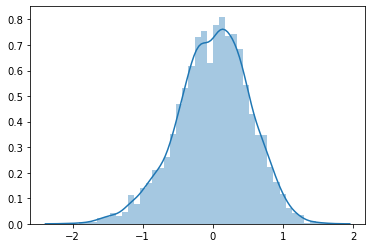

In [28]:
# Checking wether residuals are normally distributed or not.

train_pred=lm1.predict(X_train)
residuals=Y_train-train_pred
sns.distplot(residuals)

DECILE~Analysis on train & test dataset.

In [29]:
# list of selcted variables, over which above model i.e. "lm1" has been built .

sv=['agecat_6',	'bfast_1',	'bfast_2',	'bfast_3',	'carbought_0',	'carbought_1',	'carbought_minus1',	'carbuy',	'carcatvalue_1',	'carcatvalue_2',	'carcatvalue_3',
'carcatvalue_minus1',	'card2_1',	'card2_2',	'card2_3',	'card2_5',	'card2benefit_1',	'card2benefit_2',	'card2benefit_3',	'card2benefit_4',	'card2fee',
'card2tenure',	'card2tenurecat_1',	'card2tenurecat_2',	'card2tenurecat_3',	'card2tenurecat_4',	'card2type_1',	'card2type_2',	'card2type_3',	'card2type_4',
'card_1',	'card_2',	'card_4',	'card_5',	'cardbenefit_1',	'cardbenefit_2',	'cardbenefit_3',	'cardbenefit_4',	'cardfee',	'cardmon',	'cardten',	'cardtenure',
'cardtenurecat_1',	'cardtenurecat_2',	'cardtenurecat_3',	'cardtenurecat_4',	'cardtype_1',	'cardtype_2',	'cardtype_3',	'cardtype_4',	'carown_0',	'carown_1',
'carown_minus1',	'cartype_0',	'cartype_1',	'cartype_minus1',	'carvalue',	'churn',	'commute_10',	'commute_2',	'commute_3',	'commute_8',	'commutebus',	'commutecar',
'commutecarpool',	'commutecat_1',	'commutecat_2',	'commutecat_3',	'commutecat_4',	'commutecat_5',	'commutenonmotor',	'commuterail',	'commutewalk',	'debtinc',
'default',	'ebill',	'ed',	'edcat_1',	'edcat_2',	'edcat_3',	'edcat_4',	'empcat_1',	'empcat_2',	'empcat_3',	'empcat_4',	'empcat_5',	'employ',	'equip',	'equipten',	'gender',
'homeown',	'hometype_1',	'hometype_2',	'hometype_3',	'hometype_4',	'hourstv',	'inccat_1',	'inccat_2',	'inccat_3',	'inccat_4',	'internet_0',	'internet_1',
'internet_2',	'internet_3',	'internet_4',	'jobcat_1',	'jobcat_2',	'jobcat_3',	'jobcat_5',	'jobcat_6',	'jobsat_1',	'jobsat_2',	'jobsat_3',	'jobsat_4',	'jobsat_5',
'lncreddebt',	'lninc',	'lnlongmon',	'lnothdebt',	'marital',	'multline',	'news',	'ownipod',	'ownpc',	'owntv',	'pets_reptiles',	'pets_saltfish',	'pets_small',
'polcontrib',	'polparty',	'polview_1',	'polview_2',	'polview_3',	'polview_4',	'polview_5',	'polview_6',	'reason_2',	'reason_3',	'reason_4',	'reason_9',	'region_1',
'region_2',	'region_3',	'region_4',	'region_5',	'response_02',	'spousedcat_1',	'spousedcat_2',	'spousedcat_3',	'spousedcat_4',	'spousedcat_minus1',
'telecommute'	,'townsize_1'	,'townsize_2'	,'townsize_3'	,'townsize_4'	,'townsize_5'	,'union',	'voice','wireless','wiremon',
'ln_total_spend',	'address',	'addresscat_1',	'addresscat_2'	,'addresscat_3'	,'addresscat_4',	'age',	'agecat_3',	'agecat_4',	'agecat_5']

In [30]:
# Including only selected variables in train & test dataset.

train1=train[sv]
test1=test[sv]

In [31]:
import warnings
warnings.filterwarnings('ignore')

train['predict']=lm1.predict(train1)
test['predict']=lm1.predict(test1)

In [32]:
train['deciles']=pd.qcut(train['predict'],10,labels=False)
test['deciles']=pd.qcut(test['predict'],10,labels=False)

predict_avg_tr=train[['deciles','predict']].groupby(train.deciles).mean().sort_index(ascending=False)['predict']
actual_avg_tr=train[['deciles','ln_total_spend']].groupby(train.deciles).mean().sort_index(ascending=False)['ln_total_spend']

predict_avg_tst=test[['deciles','predict']].groupby(test.deciles).mean().sort_index(ascending=False)['predict']
actual_avg_tst=test[['deciles','ln_total_spend']].groupby(test.deciles).mean().sort_index(ascending=False)['ln_total_spend']


decile_analysis_train=pd.concat([predict_avg_tr,actual_avg_tr],axis=1).reset_index()
decile_analysis_test=pd.concat([predict_avg_tst,actual_avg_tst],axis=1).reset_index()

In [33]:
decile_analysis_train

,deciles,predict,ln_total_spend
0,9,6.722598,6.693972
1,8,6.432435,6.439034
2,7,6.262985,6.262886
3,6,6.133321,6.142592
4,5,6.016670,6.039554
5,4,5.912877,5.925707
6,3,5.817319,5.820608
7,2,5.723889,5.748777
8,1,5.615303,5.575717
9,0,5.388645,5.377194


In [34]:
decile_analysis_test

,deciles,predict,ln_total_spend
0,9,6.728055,6.711875
1,8,6.437657,6.447832
2,7,6.262823,6.283653
3,6,6.131239,6.196726
4,5,6.019459,6.019312
5,4,5.924205,5.913834
6,3,5.823656,5.794962
7,2,5.720337,5.731242
8,1,5.594474,5.608484
9,0,5.372482,5.491455


In [35]:
MAPE_train=(np.mean(np.abs(train['ln_total_spend']-train['predict'])/train['ln_total_spend']))*100
MAPE_test=(np.mean(np.abs(test['ln_total_spend']-test['predict'])/test['ln_total_spend']))*100

print(f'Mean absolute percentage error in train-dataset: {MAPE_train}')
print(f'Mean absolute percentage error in test-dataset: {MAPE_test}')

Mean absolute percentage error in train-dataset: 6.988461739262846
Mean absolute percentage error in test-dataset: 7.199259905926338


Checking normality of residuals/errors

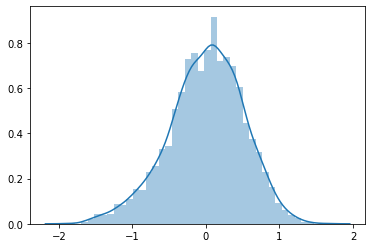

In [37]:
# Normality using distribution-plot 

sns.distplot(lm1.resid)
plt.show()

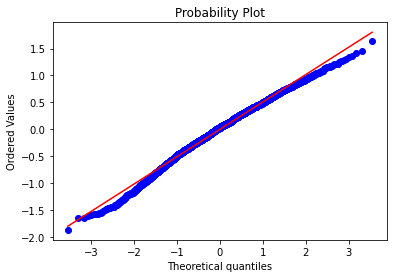

In [36]:
# Normality using Q-Q plot.

from scipy import stats
import pylab
stats.probplot(lm1.resid,dist='norm',plot=pylab)
pylab.show()

In [39]:
# Mean of residuals.

print(lm1.resid.mean())

-3.5543377764822386e-14


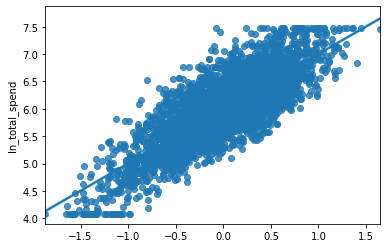

In [40]:
# Homoscedasticity of residuals.

sns.regplot(x=lm1.resid,y=train.ln_total_spend)

Insights: 

So, these are the variables that affect the credit card spending of a customer: 

address,addresscat,age,agecat,bfast,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenure,card2tenurecat, card2type,cardbenefit,cardfee,cardmon,cardten,cardtenure,cardtenurecat,cardtype,carown,cartype,carvalue,churn,commute, commutebus,commutecar,commutecarpool,commutecat,commutenonmotor,commuterail,commutewalk,debtinc,default,ebill,ed,edcat,empcat, employ,equip,equipten,gender,homeown,hometype,hourstv,inccat,internet,jobcat,jobsat,lncreddebt,lninc,lnlongmon,lnothdebt, marital,multline,news,ownipod,ownpc,owntv,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region, response,spousedcat,telecommute,townsize,union,voice,wireless,wiremon

-------------------------------------------------------------------------------------------------------------------------------